# Analiziranje planetov in lun 3.del (Skupna analiza)

V tej datoteki analiziramo podatke, ki smo jih pridobili kot presek informacij iz obeh izbranih strani. V analizi nastopa 216 podatkov katerim smo priredili informacije iz druge strani (Wookiepedia)

In [9]:
import os
import pandas as pd

podatki_obdelani = 'CSV datoteke'
csv_3 = 'planeti-lune-skupni.csv'
pd.set_option("display.max_rows", 12) # Št. vrstic


path_3 = os.path.join(podatki_obdelani, csv_3)
planeti3 = pd.read_csv(path_3)
planeti3.index += 1

## 1. Osnovne informacije

Glede na to, da gre za bolj poznane planete pričakujemo, da bo izvedeli precej več informacij o kategorijah (tj. manj 'Unknown podatkov)

### 1.1 Tabela podatkov

In [10]:
planeti3

,Ime,Regija,Sektor,Sistem,Prebivalstvo
1,Abafar,Outer Rim Territories,Sprizen sector,Abafar system,Various
2,Agamar,Outer Rim Territories,Unknown,Agamar system,Unknown
3,Ahch-To,Unknown Regions,Unknown,Ahch-To system,"Human,Lanai"
4,Akiva,Outer Rim Territories,Unknown,Unknown,"Ahia-Ko,Uugteen"
5,Alderaan,Core Worlds,Alderaan sector,Alderaan system,Humans(Alderaanian)
...,...,...,...,...,...
212,Vardos,Core Worlds,Unknown,Jinata system,"Aqualish,Humans"
213,Wobani,Mid Rim Territories,Bryx sector,Wobani system,Humans
214,Wrea,Outer Rim Territories,Unknown,Unknown,Wreans
215,Zeffo,Outer Rim Territories,Unknown,Zeffo system,Zeffonian


## 2. Tabele

### 2.1 Pogostsot začetnic

In [8]:
zacetnice_ponovitve = {}
for i in "ABCDEFGHIJKLMNOPRSTUVWXYZ": # Zadošča angleška abeceda (imen planetov ne slovenimo)
    zacetnice_ponovitve[i] = 0
    for j in planeti3['Ime']:
        if i == j[0]:
            zacetnice_ponovitve[i] += 1
            
zacetnice = {'začetnice':list(zacetnice_ponovitve.keys()), 'ponovitve':list(zacetnice_ponovitve.values())}
zacetnice_pd = pd.DataFrame.from_dict(zacetnice)
zacetnice_pd = zacetnice_pd.set_index(['začetnice'])

In [11]:
zacetnice_pd

,ponovitve
začetnice,
A,24
B,10
C,18
D,12
E,10
...,...
V,2
W,4
X,0


### 2.2 Katera regija je najbolj zastopana?

In [23]:
def najpogostejsa_upodobitev_1(podatki):
    upodobitve = {}  # Slovar za shranjevanje števila upodobitev vsakega filma/serije

    for index, planet in podatki.iterrows():
        upodobitev = planet['Regija']

        if upodobitev in upodobitve:
            upodobitve[upodobitev] += 1
        else:
            upodobitve[upodobitev] = 1
    
    return upodobitve

upodobitve_planet3 = najpogostejsa_upodobitev_1(planeti3)

In [24]:
# Podatki za tabelo
podatki_tabela = {
    'Regija': list(upodobitve_planet3.keys()),
    'Število planetov': list(upodobitve_planet3.values())
}

# Ustvarimo tabelo iz podatkov
tabela = pd.DataFrame(podatki_tabela)

# Uredimo tabelo po padajočem vrstnem redu števila planetov
tabela = tabela.sort_values(by='Število planetov', ascending=False)

tabela

,Regija,Število planetov
0,Outer Rim Territories,120
4,Mid Rim Territories,36
2,Core Worlds,18
3,Unknown,12
8,Expansion Region,8
1,Unknown Regions,6
5,Colonies,6
6,Inner Rim Territories,4
7,Extragalactic,2
9,Galactic Frontier,2


Opazimo lahko, da je bila predpostavka o podatkih pravilna.

### 2.3 Kateri sektor je najbolj zastopan?

In [14]:
def najpogostejsa_upodobitev(podatki):
    upodobitve = {}  # Slovar za shranjevanje števila upodobitev vsakega filma/serije

    for index, planet in podatki.iterrows():
        upodobitev = planet['Sektor']

        if upodobitev in upodobitve:
            upodobitve[upodobitev] += 1
        else:
            upodobitve[upodobitev] = 1
    
    return upodobitve

upodobitve_planet2 = najpogostejsa_upodobitev(planeti3)

In [15]:
# Podatki za tabelo
podatki_tabela = {
    'Sektor': list(upodobitve_planet2.keys()),
    'Število planetov': list(upodobitve_planet2.values())
}

# Ustvarimo tabelo iz podatkov
tabela = pd.DataFrame(podatki_tabela)

# Uredimo tabelo po padajočem vrstnem redu števila planetov
tabela = tabela.sort_values(by='Število planetov', ascending=False)

tabela

,Sektor,Število planetov
1,Unknown,60
3,Bright Jewel sector,6
14,Savareen sector,6
7,Anoat sector,6
36,Bryx sector,4
...,...,...
27,Free Trade sector,2
28,Sertar sector,2
30,Ash Worlds,2
32,Jakku's sector,2


V tem primeru je predpostavka napačna, a procentualno je razlika poznanih sektorjev večja kot v Analizi2, kar pa je bilo pričakovano.

### 2.4 Prebivalstvo

In [16]:
# Izberemo samo planete, katerih prebivalstvo ni 'Unknown'
planeti_z_znanim_prebivalstvom = planeti3[planeti3['Prebivalstvo'] != 'Unknown']

# Ustvarimo tabelo 
tabela_planetov = planeti_z_znanim_prebivalstvom[['Ime', 'Prebivalstvo']]

# Izpis tabele
tabela_planetov

,Ime,Prebivalstvo
1,Abafar,Various
3,Ahch-To,"Human,Lanai"
4,Akiva,"Ahia-Ko,Uugteen"
5,Alderaan,Humans(Alderaanian)
6,Aldhani,Humans(Dhani)
...,...,...
212,Vardos,"Aqualish,Humans"
213,Wobani,Humans
214,Wrea,Wreans
215,Zeffo,Zeffonian


### 2.5 Koliko planetov in lun je poseljenih?

V tem primeru pričakujemo, da bo število poseljenih predmetov > od števila neposeljenih:

In [17]:
# Preštejemo poseljene in neposeljene planete
stevilo_poseljenih = len(tabela_planetov)
stevilo_neposeljenih = len(planeti3[planeti3['Prebivalstvo'] == 'Unknown'])

# Ustvarimo tabelo
tabela_poseljenost = pd.DataFrame({
    'Stanje': ['Poseljeni', 'Neposeljeni'],
    'Število planetov': [stevilo_poseljenih, stevilo_neposeljenih]
})

# Izpišemo tabelo
tabela_poseljenost

,Stanje,Število planetov
0,Poseljeni,156
1,Neposeljeni,60


## 3. Grafi in diagrami

Še poslednjič pridobljene podtke predstavimo grafično:

In [18]:
import matplotlib.pyplot as plt

### 3.1 Pogostost začetnic

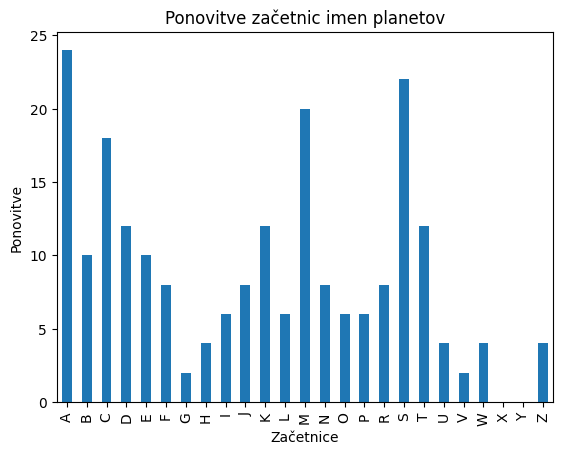

In [19]:
zacetnice_pd.plot(kind='bar', legend=False)
plt.xlabel('Začetnice')
plt.ylabel('Ponovitve')
plt.title('Ponovitve začetnic imen planetov')
plt.show()

Komentar: Vsi grafi začetnic (ne glede na količino podatkov) so zelo podobni. Zakaj prevladujejo črke A,C,M,S pa je potrebno vprašati ustvarjalce.

### 3.2 Katera regija je najbolj zastopana? 

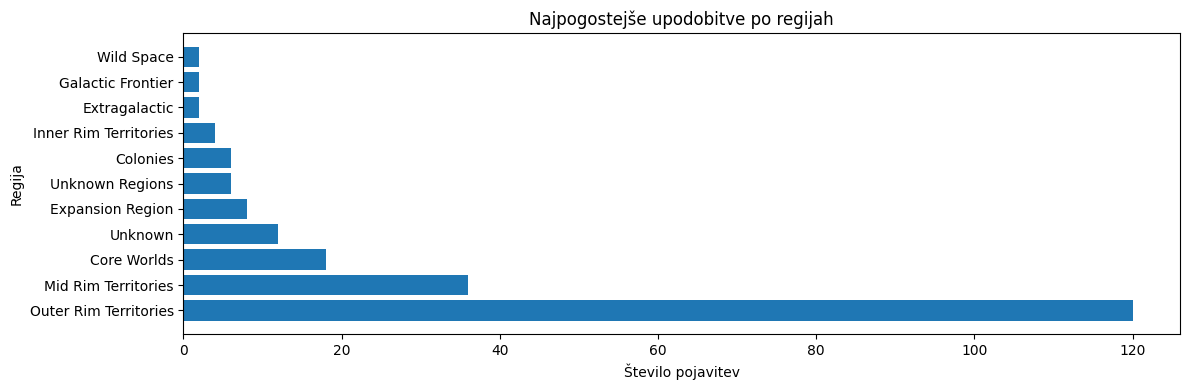

In [26]:
upodobitve_planet2 = najpogostejsa_upodobitev_1(planeti3)

# Pretvorimo slovar v DataFrame
upodobitve_df = pd.DataFrame.from_dict(upodobitve_planet2, orient='index', columns=['Število pojavitev'])

# Sortiramo po številu pojavitev
upodobitve_df = upodobitve_df.sort_values(by='Število pojavitev', ascending=False)

# Narišemo stolpični diagram
plt.figure(figsize=(12, 4))
plt.barh(upodobitve_df.index, upodobitve_df['Število pojavitev'])
plt.xlabel('Število pojavitev')
plt.ylabel('Regija')
plt.title('Najpogostejše upodobitve po regijah')
plt.tight_layout()
plt.show()


### 3.3 Kateri sektor je najbolj zastopan?

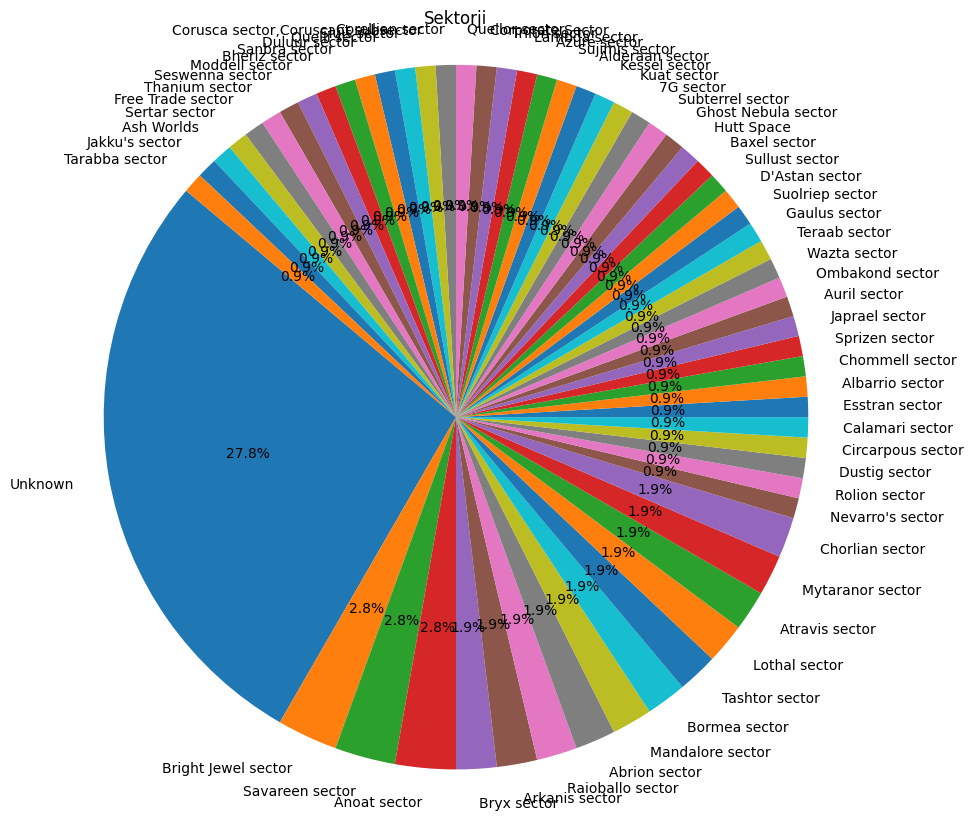

In [32]:
upodobitve_planet3 = najpogostejsa_upodobitev(planeti3)

# Pretvorimo slovar v DataFrame
upodobitve_df = pd.DataFrame.from_dict(upodobitve_planet3, orient='index', columns=['Število pojavitev'])

# Sortiramo po številu pojavitev
upodobitve_df = upodobitve_df.sort_values(by='Število pojavitev', ascending=False)

# Tortni diagram
plt.figure(figsize=(10, 10))
plt.pie(upodobitve_df['Število pojavitev'], labels=upodobitve_df.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Krog
plt.title('Sektorji')
plt.show()

Komentar: Vidimo, da je situacija kar se tiče znanega, precej boljša.

### 3.4 Prebivalstvo

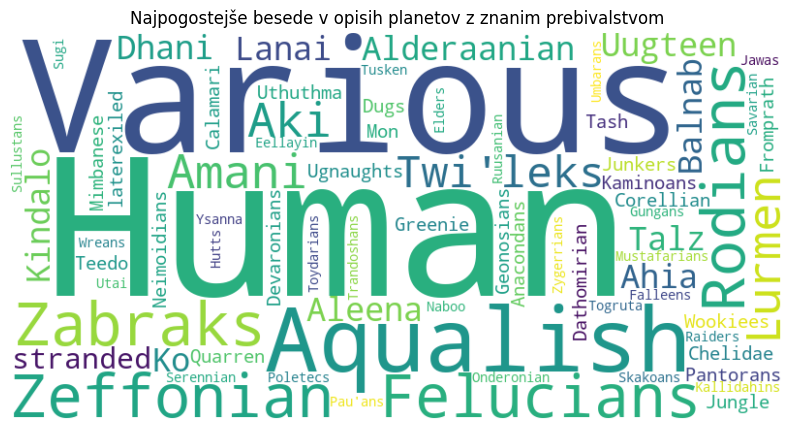

In [33]:
from wordcloud import WordCloud

opisi_planet = ' '.join(planeti_z_znanim_prebivalstvom['Prebivalstvo'].dropna())

# Ustvarimo oblačni graf
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(opisi_planet)

# Prikaz 
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Najpogostejše besede v opisih planetov z znanim prebivalstvom')
plt.show()

### Koliko planetov in lun je poseljenih?

Zopet lahko pričakujemo, da bo število poseljenih planetov precej večje kot v Analizi2:

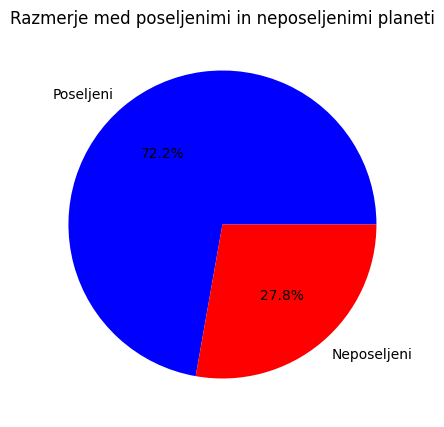

In [34]:
statusi = ['Poseljeni', 'Neposeljeni']
stevila = [stevilo_poseljenih, stevilo_neposeljenih]

# Narišemo tortni diagram
plt.figure(figsize=(5, 5))
plt.pie(stevila, labels=statusi, autopct='%1.1f%%', colors=['blue', 'red'])
plt.title('Razmerje med poseljenimi in neposeljenimi planeti')
plt.show()

Komentar: V obsegu več kot 2000 planetov je bil procent poselejnih malo pod 40%, med nekaj vek kot 200 planeti "po izboru" Wikipedije pa dobrih 72%. Vredno je še enkrat omeniti, da je že v začetku šlo za predpostavko, da so planeti z prebivalstvom 'Unknown' neposeljeni (kar seveda ni nujno res, a znatno olajša našo analizo).

S tem zaključejem svojo projektno nalogo. Za več informacij si preberite README.md ali pa obiščite izbrani spletni strani.